Step 1 - Import python libraries

In [1]:
from IPython import get_ipython
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import os
pd.options.mode.chained_assignment = None

Step 2 - Load and read your data file
- pyTCR accepts a single `.csv` file that should contain all the samples.
  - The following cell attempts to detect whether you are running the notebook in a Google Colab cloud environment or in a local environment, and then loads the data at the specified path.
- The `filePath` variable in the following code cell should be changed to the location of your file. The following options are supported:
  1. A `filePath` from Google Drive (to run on a cloud environment)
  2. A `filePath` from your local computer (to run on a local environment, other cloud environments should work as expected)
- Adjust the `optional_fields` according to your data

In [2]:
# Specify the path to your data in Google Drive or locally
filePath = "/scratch1/pjaiswal/ipynb_notebooks/master_files/MIXCR_inhouse_all.csv" # or "/content/drive/MyDrive/combined_data.csv"
directory_path =  "/scratch1/pjaiswal/ipynb_notebooks/Figures/"
df = pd.read_csv(filePath, low_memory=False, engine="c")


df.head()

,Unnamed: 0,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,Type
0,0,HD_30_S14_L001_original_MIXCR,0.0274990246433412,6837.0,CAGFSGGYQKVTF,TGTGCGGGCTTTTCTGGGGGTTACCAGAAAGTTACCTTT,TRAV5*00(3322.5),.,TRAJ13*00(587.4),Original_Mixcr
1,1,HD_30_S14_L001_original_MIXCR,0.0085791165078611,2133.0,CAVDSDNDMRF,TGTGCCGTGGACTCCGACAATGACATGCGCTTT,TRAV39*00(3400.2),.,TRAJ43*00(478.3),Original_Mixcr
2,2,HD_30_S14_L001_original_MIXCR,0.0043921215314507,1092.0,CATPYNFNKFYF,TGTGCTACGCCCTACAACTTCAACAAATTTTACTTT,TRAV17*00(3494),.,TRAJ21*00(547.9),Original_Mixcr
3,3,HD_30_S14_L001_original_MIXCR,0.004074376475604,1013.0,CAFGKGGSNYKLTF,TGTGCCTTCGGTAAGGGAGGTAGCAACTATAAACTGACATTT,TRAV24*00(3479.8),.,TRAJ53*00(576.9),Original_Mixcr
4,4,HD_30_S14_L001_original_MIXCR,0.003941647528225,980.0,CLVGDRGNFNKFYF,TGCCTCGTGGGTGACCGGGGCAACTTCAACAAATTTTACTTT,TRAV4*00(3363.9),.,TRAJ21*00(527.8),Original_Mixcr


In [3]:
df.dtypes

Unnamed: 0     int64
sample        object
freq          object
#count        object
cdr3aa        object
cdr3nt        object
v             object
d             object
j             object
Type          object
dtype: object

In [4]:
# Convert 'freq' and '#count' to numeric, invalid parsing will be set as NaN
df['freq'] = pd.to_numeric(df['freq'], errors='coerce')
df['#count'] = pd.to_numeric(df['#count'], errors='coerce')


Clonality analysis 1 - the most frequent clonotype

In [5]:
df_clonality_most = df.loc[df.groupby('sample')['freq'].idxmax()]
df_clonality_most = df_clonality_most[['sample','cdr3aa', 'Type', '#count']]

df_clonality_most

,sample,cdr3aa,Type,#count
1723520,HD_10_S1_L001_original_MIXCR,CAVNRITGGGNKLTF,Original_Mixcr,89575.0
1918401,HD_10_S1_L001_shuffle,CAVNRITGGGNKLTF,Shuffle_Mixcr,85410.0
1017715,HD_14_S2_L001_original_MIXCR,CASSFRVLAKNIQYF,Original_Mixcr,769.0
2106949,HD_14_S2_L001_shuffle,CASSFRVLAKNIQYF,Shuffle_Mixcr,770.0
642432,HD_20_S4_L001_original_MIXCR,CAFIKGSGGSNYKLTF,Original_Mixcr,9180.0
2346841,HD_20_S4_L001_shuffle,CAFIKGSGGSNYKLTF,Shuffle_Mixcr,9159.0
1658059,HD_21_S5_L001_original_MIXCR,CSALSGRTYNEQFF,Original_Mixcr,6748.0
3724599,HD_21_S5_L001_shuffle,CSALSGRTYNEQFF,Shuffle_Mixcr,6672.0
1811322,HD_22_S6_L001_original_MIXCR,CAVRSGGYQKVTF,Original_Mixcr,47579.0
2930287,HD_22_S6_L001_shuffle,CAVRSGGYQKVTF,Shuffle_Mixcr,47604.0


Clonality analysis 2 - the least frequent clonotype

In [6]:
df_clonality_least = df.loc[df.groupby('sample')['freq'].idxmin()]
df_clonality_least = df_clonality_least[['sample', 'Type', 'cdr3aa', '#count']]

df_clonality_least

,sample,Type,cdr3aa,#count
1742247,HD_10_S1_L001_original_MIXCR,Original_Mixcr,CILRDM_DYKLSF,1.0
1937066,HD_10_S1_L001_shuffle,Shuffle_Mixcr,CILRDM_DYKLSF,1.0
998076,HD_14_S2_L001_original_MIXCR,Original_Mixcr,CAVSDRSGANSKLTF,1.0
2087186,HD_14_S2_L001_shuffle,Shuffle_Mixcr,CAVSDRSGANSKLTF,1.0
666463,HD_20_S4_L001_original_MIXCR,Original_Mixcr,CLVGEDDYKLSF,1.0
2370789,HD_20_S4_L001_shuffle,Shuffle_Mixcr,CLVGEDDYKLSF,1.0
1657989,HD_21_S5_L001_original_MIXCR,Original_Mixcr,CILI**C_GNMLTF,1.0
3724532,HD_21_S5_L001_shuffle,Shuffle_Mixcr,CILI**C_GNMLTF,1.0
1842274,HD_22_S6_L001_original_MIXCR,Original_Mixcr,CLVGQEA_TLGRLYF,1.0
2961246,HD_22_S6_L001_shuffle,Shuffle_Mixcr,CLVGQEA_TLGRLYF,1.0


Clonality analysis 3.1 - 1-Pielou index

In [7]:
# Calculate the clonotype counts for each sample
df_diversity = df.groupby(['sample'], sort=False).size().reset_index(name='clonotype_count')

# Add the clonotype counts as a column to the dataframe
df_clonality=pd.merge(df, df_diversity, on=['sample'])

# Calculate 1-Pielou index
df_clonality['clonality'] = df_clonality['freq']*np.log(df_clonality['freq'])/np.log(df_clonality['clonotype_count'])
df_clonality= df_clonality.groupby(['sample', 'Type']).agg({'clonality':'sum'}).reset_index().rename(columns={'':"clonality"})
df_clonality['1_pielou'] = df_clonality['clonality'] + 1
df_clonality = df_clonality[['sample', 'Type','1_pielou']]

df_clonality

,sample,Type,1_pielou
0,HD_10_S1_L001_original_MIXCR,Original_Mixcr,-0.023160
1,HD_10_S1_L001_shuffle,Shuffle_Mixcr,-0.027276
2,HD_14_S2_L001_original_MIXCR,Original_Mixcr,-0.749882
3,HD_14_S2_L001_shuffle,Shuffle_Mixcr,-0.750186
4,HD_20_S4_L001_original_MIXCR,Original_Mixcr,-0.547069
5,HD_20_S4_L001_shuffle,Shuffle_Mixcr,-0.547428
6,HD_21_S5_L001_original_MIXCR,Original_Mixcr,-0.706042
7,HD_21_S5_L001_shuffle,Shuffle_Mixcr,-0.705927
8,HD_22_S6_L001_original_MIXCR,Original_Mixcr,-0.335463
9,HD_22_S6_L001_shuffle,Shuffle_Mixcr,-0.335309


Clonality analysis 3.2 - Statistical analysis of 1-Pielou index

Clonality analysis 3.2.1 - Test if 1-Pielou index is normally distributed
1.   the null hypothesis here is normality
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). if the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)

In [8]:
x = stats.normaltest(df_clonality['1_pielou'])
x

NormaltestResult(statistic=20.329685601062735, pvalue=3.850036637310121e-05)

Clonality analysis 3.2.2 - Mean or median of 1-Pielou index among groups
1.   if the dataset is normally distributed, calculate mean
2.   if the dataset is not normally distributed, calculate median

In [9]:
# Calculate the mean among two groups
df_clonality_mean = df_clonality.groupby('Type')['1_pielou'].mean().reset_index()

df_clonality_mean

,Type,1_pielou
0,Original_Mixcr,-0.587395
1,Shuffle_Mixcr,-0.587726


In [ ]:
# Calculate the median among two groups
df_clonality_median = df_clonality.groupby('hospitalized')['1_pielou'].median().reset_index()

df_clonality_median

Clonality analysis 3.2.3 - Stats test
1.   If the dataset is normally distributed, use t-test (stats.ttest_ind)
*   change the group1, group2 to the groups/samples that you are interested in
2.   If the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in

In [10]:
df1 = df_clonality.copy()
df_group1 = df1[df1['Type'] == True]
df_group2 = df1[df1['Type'] == False]
stats.ranksums(df_group1['1_pielou'], df_group2['1_pielou'])

/home1/pjaiswal/.local/lib/python3.12/site-packages/scipy/stats/_stats_py.py:9154: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


RanksumsResult(statistic=nan, pvalue=nan)

Clonality analysis 4.1 - Clonal proportion

In [11]:
# Create an empty dataframe for storing results
df_clonality_portion = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample]

    # Sort the sample clonotypes by frequency in descending order
    df_temp = df_temp.sort_values(by='freq', ascending=False)

    # Create a column to store the order
    df_temp['clonotype_number'] = np.arange(df_temp.shape[0])+1

    # Compute and store the cumulative sum of the frequencies
    df_temp['accum_freq'] = df_temp['freq'].cumsum()

    # Filter out accumulated frequencies smaller than 10% (10% can be adjusted by the user)
    df_temp = df_temp.loc[(df_temp['accum_freq']>=0) & (df_temp['accum_freq']<=0.1)]

    # Select the smallest accumulated frequency record and stores in the result dataframe
    df_temp = df_temp.sort_values(by='accum_freq', ascending=False)
    df_temp = df_temp.head(1)
    df_clonality_portion = pd.concat([df_clonality_portion, df_temp],sort=True)

    # Show the results
    df_clonality_portion = df_clonality_portion[['sample','Type','clonotype_number']]

df_clonality_portion.columns = ['sample', 'Type', 'clonality_portion']
df_clonality_portion

,sample,Type,clonality_portion
717805,HD_24_S8_L001_original_MIXCR,Original_Mixcr,3
829642,HD_29_S13_L001_original_MIXCR,Original_Mixcr,1
1509945,HD_25_S9_L001_original_MIXCR,Original_Mixcr,69
1616727,RS_10_original_MIXCR,Original_Mixcr,11
1877241,RS_11_original_MIXCR,Original_Mixcr,10
1645489,HD_21_S5_L001_original_MIXCR,Original_Mixcr,4
2714308,HD_25_S9_L001_shuffle,Shuffle_Mixcr,69
2913993,RS_4_LY_shuffle,Shuffle_Mixcr,26
3513850,HD_36_S20_L001_shuffle,Shuffle_Mixcr,14
2346842,HD_20_S4_L001_shuffle,Shuffle_Mixcr,2


Clonality analysis 4.2 - Statistical analysis of clonality portion

Clonality analysis 4.2.1 - Test if the clonality portion is normally distributed
1.   the null hypothesis here is normality
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)

In [12]:
x = stats.normaltest(df_clonality_portion['clonality_portion'])
x

NormaltestResult(statistic=13.693560691296343, pvalue=0.0010628722711890127)

Clonality analysis 4.2.2 - Mean or median of clonality portion among groups
1.   if the dataset is normally distributed, calculate mean
2.   if the dataset is not normally distributed, calculate median

In [13]:
# Calculate the mean among two groups
df_clonality_portion_mean = df_clonality_portion.groupby('Type')['clonality_portion'].mean().reset_index()

df_clonality_portion_mean

,Type,clonality_portion
0,Original_Mixcr,22.736842
1,Shuffle_Mixcr,22.789474


In [ ]:
# Calculate the median among two groups
df_clonality_portion_median = df_clonality_portion.groupby('Type')['clonality_portion'].median().reset_index()

df_clonality_portion_median

Clonality analysis 4.2.3 - Stats test
1.   if the dataset is normally distributed, use t-test
*   change the group1, group2 to the groups/samples that you are interested in
2.   if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in

In [14]:
df2 = df_clonality_portion.copy()
df_group1 = df2[df2['Type'] == True]
df_group2 = df2[df2['Type'] == False]
stats.ranksums(df_group1['clonality_portion'], df_group2['clonality_portion'])

/home1/pjaiswal/.local/lib/python3.12/site-packages/scipy/stats/_stats_py.py:9154: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


RanksumsResult(statistic=nan, pvalue=nan)

Clonality analysis 4.3 - Clonality portion plot per sample
1.   x-axis and y-axis labels, figsize, fontsize are customizable

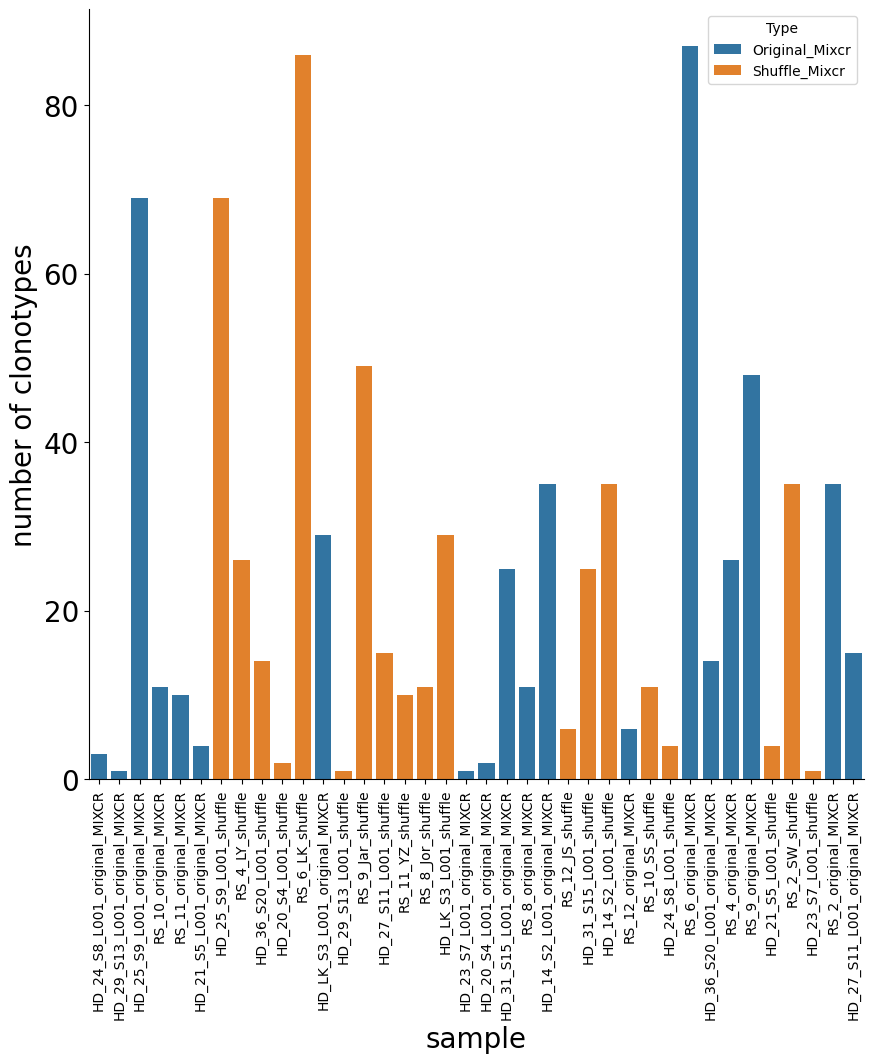

<Figure size 640x480 with 0 Axes>

In [19]:
ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(data=df_clonality_portion,x='sample',y='clonality_portion',hue='Type')
ax.set_xlabel('sample',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=20)
sns.despine()

plt.show()
plt.savefig('/scratch1/pjaiswal/figures/clonalityAnaysisMIXCRinhouse.png') 

Clonality analysis 4.4 -  Clonality portion violin plot per group
1.   x-axis and y-axis labels, figsize, fontsize are customizable
2.   change the violin plot (sns.violinplot) to the plot type that you are interested in, includes strip plot (sns.stripplot), swarm plot (sns.swarmplot), box plot (sns.boxplot), boxen plot (sns.boxenplot), point plot (sns.pointplot), and bar plot (sns.barplot)

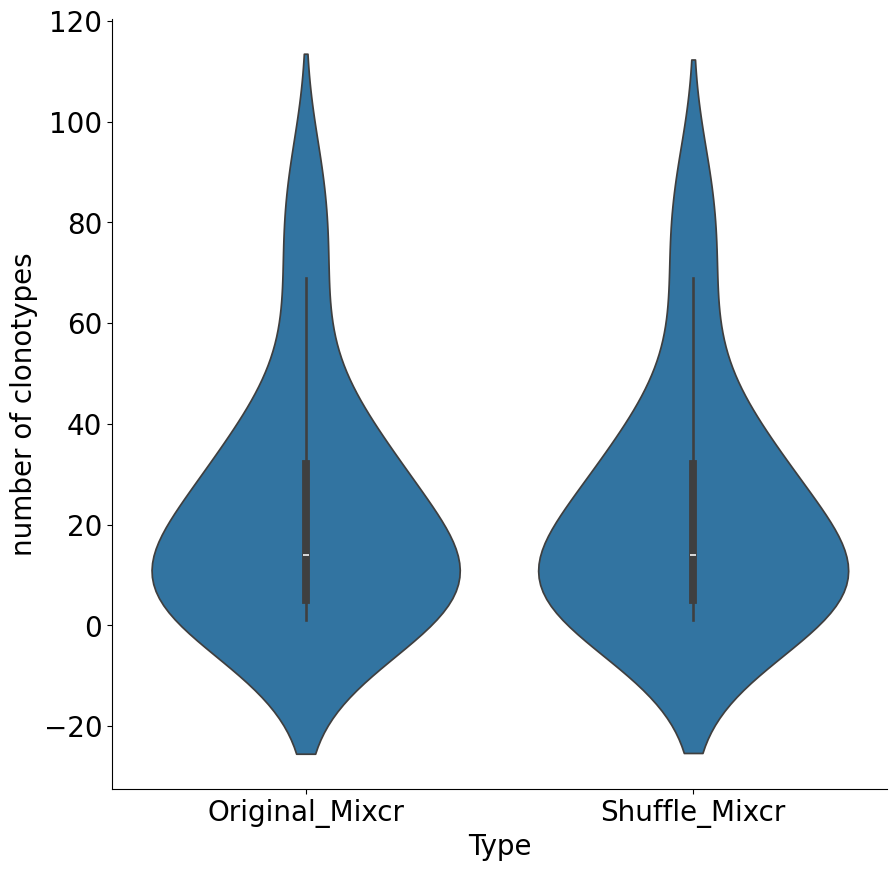

In [16]:
ax = plt.subplots(figsize = (10,10))

ax = sns.violinplot(x='Type',y='clonality_portion', data=df_clonality_portion)

ax.set_xlabel('Type',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()
plt.savefig(os.path.join(directory_path, 'clonalityAnaysisMIXCRinhouseViolin.png')) 
plt.show()

Clonality analysis 5 - Relative abundance (in all clonotypes)

In [17]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['freq'] > 0.01 and row['freq'] <= 1:
        return 'Hyperexpanded'
    if row['freq'] > 0.001 and row['freq'] <= 0.01:
        return 'Large'
    if row['freq'] > 0.0001 and row['freq'] <= 0.001:
        return 'Medium'
    if row['freq'] > 0.00001 and row['freq'] <= 0.0001:
        return 'Small'
    if row['freq'] > 0 and row['freq'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
df['clonotype_group'] = df.apply (lambda row: clonotype_group(row),axis=1)

# Calculate the relative abundance in each sample based on clonotype groups
df_relative_abundance= df.groupby(['sample','Type','clonotype_group']).agg({'freq':'sum'}).reset_index().rename(columns={'':"relative_abundance"})
df_relative_abundance

,sample,Type,clonotype_group,freq
0,HD_10_S1_L001_original_MIXCR,Original_Mixcr,Hyperexpanded,1.058087
1,HD_10_S1_L001_original_MIXCR,Original_Mixcr,Large,0.160694
2,HD_10_S1_L001_original_MIXCR,Original_Mixcr,Medium,0.103344
3,HD_10_S1_L001_original_MIXCR,Original_Mixcr,Rare,0.167402
4,HD_10_S1_L001_original_MIXCR,Original_Mixcr,Small,0.491708
...,...,...,...,...
272,RS_9_Jar_shuffle,Shuffle_Mixcr,Rare,0.000009
273,RS_9_Jar_shuffle,Shuffle_Mixcr,Small,0.898261
274,RS_9_original_MIXCR,Original_Mixcr,Large,0.110246
275,RS_9_original_MIXCR,Original_Mixcr,Medium,0.922596


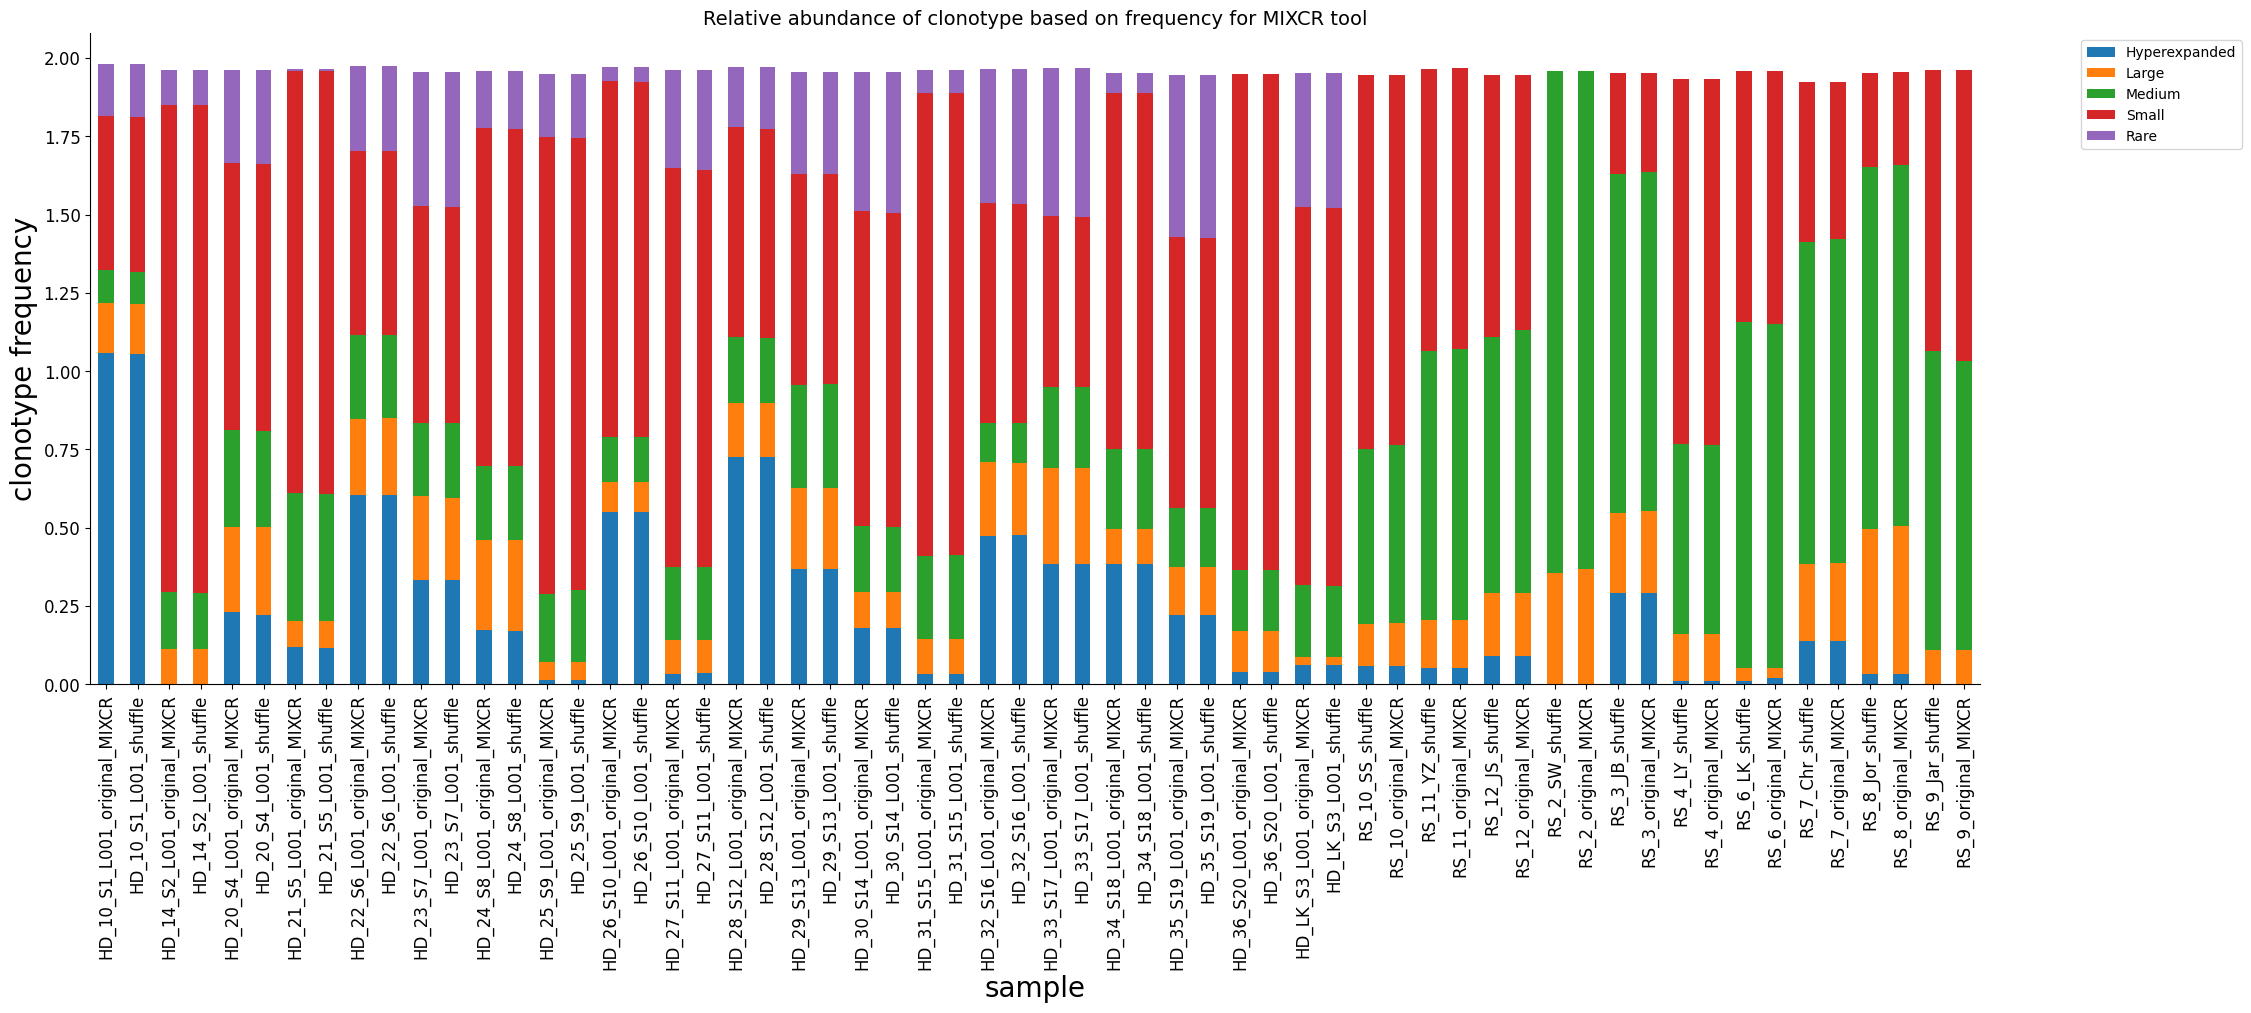

In [32]:
label_order = ['Hyperexpanded', 'Large', 'Medium', 'Small', 'Rare']

ax = df_relative_abundance.groupby(['sample', 'clonotype_group'])['freq'].sum().unstack()[label_order].plot(kind='bar', stacked=True)
ax.set_xlabel('sample', fontsize=20)
ax.set_ylabel('clonotype frequency', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gcf().set_size_inches(20, 10)
sns.despine()
plt.tight_layout()
plt.title('Relative abundance of clonotype based on frequency for MIXCR tool', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure with tight layout
plt.savefig('/scratch1/pjaiswal/figures/clonalityAnaysisMIXCRinhouseGCF.png', bbox_inches='tight')
plt.show()

Clonality analysis 6 - Relative abundance in top clonotypes
1.   the top clonotypes are defined as top 100 clonotypes in the analysis below

In [22]:
# Define groups based on clone counts
def reads_group_top (row):
    if row['#count'] > 1 and row['#count'] <= 10:
        return '1-10'
    if row['#count'] >= 11 and row['#count'] <= 100:
        return '11-100'
    if row['#count'] >= 101 and row['#count'] <= 1000:
        return '101-1000'
    if row['#count'] >= 1001 and row['#count'] <= 5000:
        return '1001-5000'

# Get the top 100 clonotypes in each sample
df_top=df.sort_values(['sample', 'freq'], axis=0).groupby('sample').tail(100)

# Apply the function to the dataframe
df_top['reads_group'] = df_top.apply (lambda row: reads_group_top(row),axis=1)

# Show the result
df_top_result = df_top[['sample','Type','reads_group']]
df_top_result

,sample,Type,reads_group
1723565,HD_10_S1_L001_original_MIXCR,Original_Mixcr,101-1000
1723566,HD_10_S1_L001_original_MIXCR,Original_Mixcr,101-1000
1747471,HD_10_S1_L001_original_MIXCR,Original_Mixcr,11-100
1747470,HD_10_S1_L001_original_MIXCR,Original_Mixcr,11-100
1747469,HD_10_S1_L001_original_MIXCR,Original_Mixcr,11-100
...,...,...,...
1799779,RS_9_original_MIXCR,Original_Mixcr,101-1000
1799778,RS_9_original_MIXCR,Original_Mixcr,101-1000
1799777,RS_9_original_MIXCR,Original_Mixcr,101-1000
1789461,RS_9_original_MIXCR,Original_Mixcr,1001-5000


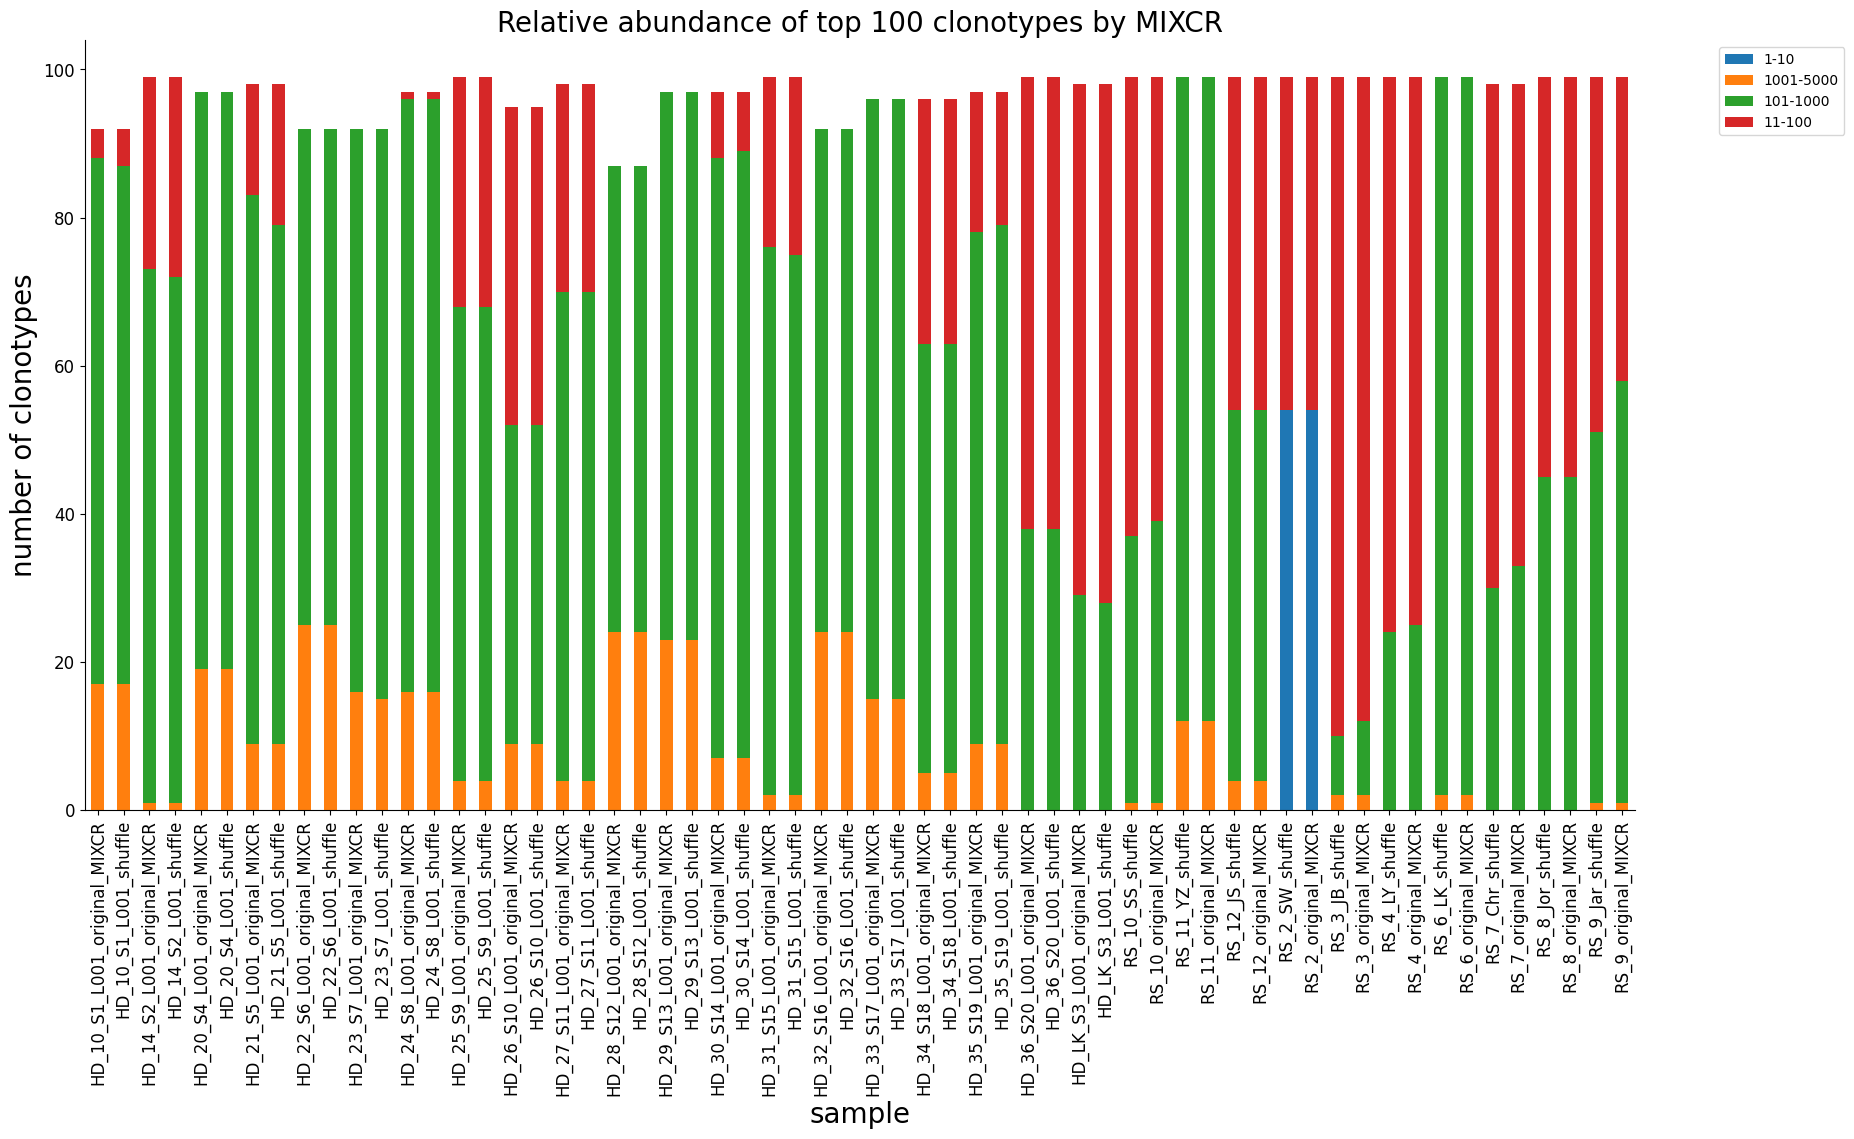

In [36]:
ax = df_top.groupby(['sample', 'reads_group'])['#count'].count().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel('sample',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gcf().set_size_inches(20,10)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Relative abundance of top 100 clonotypes by MIXCR', fontsize = 20)
plt.savefig('/scratch1/pjaiswal/figures/clonalityAnaysisMIXCRinhouseGCF2.png', bbox_inches='tight')
plt.show()

Clonality analysis 7 - Relative abundance in rare clonotypes
1.   the rare clonotypes are defined as rare 100 clonotypes in the analysis below

In [37]:
# Define groups based on clone counts
def reads_group_rare (row):
    if row['#count'] == 1 :
        return '1'
    if row['#count'] >= 2 and row['#count'] <= 3:
        return '2-3'
    if row['#count'] >= 4 and row['#count'] <= 10:
        return '4-10'
    if row['#count'] >= 11 and row['#count'] <= 30:
        return '11-30'
    if row['#count'] >= 31 and row['#count'] <= 100:
        return '31-100'
    if row['#count'] >= 101 and row['#count'] <= 200:
        return '101-200'

# Get the rare 100 clonotypes
df_rare=df.sort_values(['sample', 'freq'], axis=0).groupby('sample').head(100)

# Apply the functions to the dataframe
df_rare['reads_group'] = df_rare.apply (lambda row: reads_group_rare(row),axis=1)

# Show the result
df_rare_result = df_rare[['sample','Type','reads_group']]
df_rare_result

,sample,Type,reads_group
1742247,HD_10_S1_L001_original_MIXCR,Original_Mixcr,1
1742248,HD_10_S1_L001_original_MIXCR,Original_Mixcr,1
1742249,HD_10_S1_L001_original_MIXCR,Original_Mixcr,1
1742250,HD_10_S1_L001_original_MIXCR,Original_Mixcr,1
1742251,HD_10_S1_L001_original_MIXCR,Original_Mixcr,1
...,...,...,...
1798924,RS_9_original_MIXCR,Original_Mixcr,2-3
1798925,RS_9_original_MIXCR,Original_Mixcr,2-3
1798926,RS_9_original_MIXCR,Original_Mixcr,2-3
1798927,RS_9_original_MIXCR,Original_Mixcr,2-3


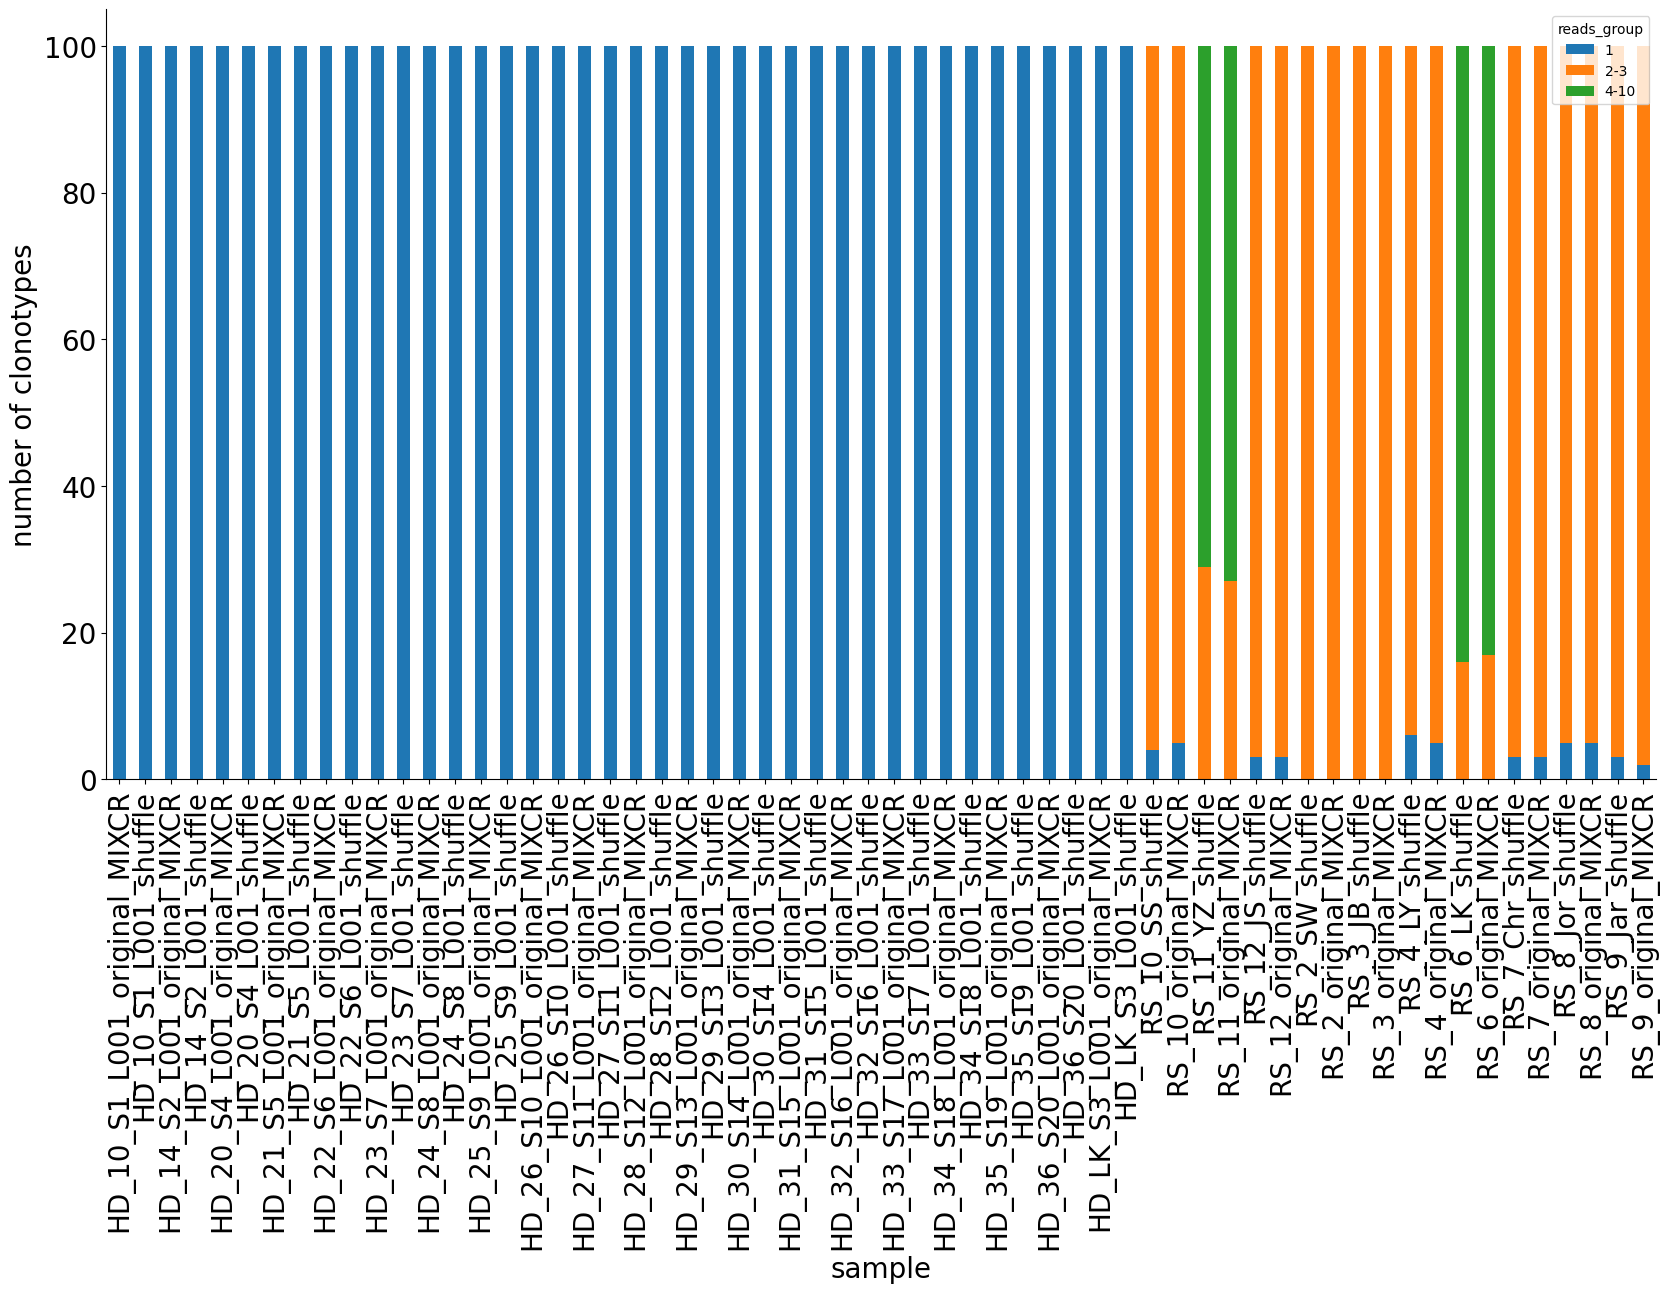

In [38]:
ax = df_rare.groupby(['sample', 'reads_group'])['#count'].count().unstack().plot(kind='bar', stacked=True)
ax.set_xlabel('sample',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20,10)
sns.despine()
plt.savefig(os.path.join(directory_path, 'clonalityAnaysisMIXCRinhouseViolinGCF3.png')) 
plt.show()